Initial Imports

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

Cleaning Data

In [88]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


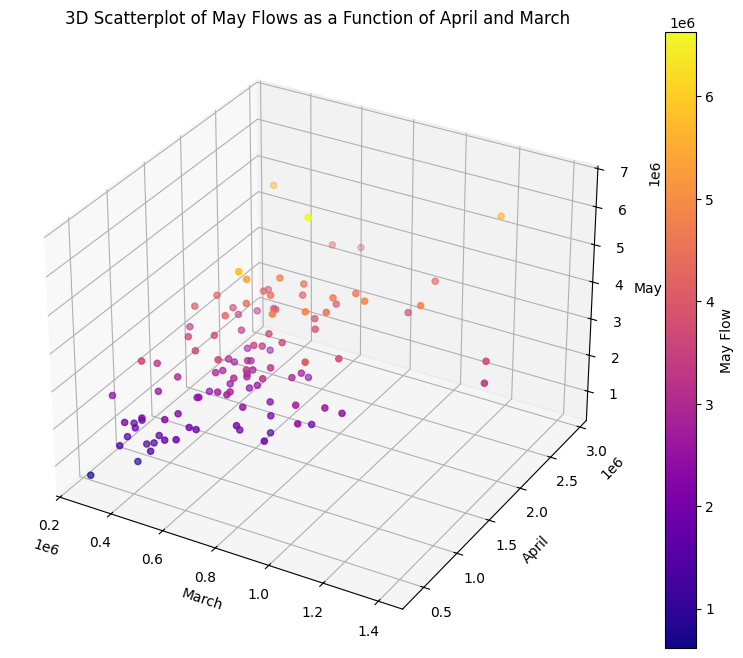

In [87]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(lee_ferry['Mar'], lee_ferry['Apr'], lee_ferry['May'], 
                     c=lee_ferry['May'], cmap='plasma')
fig.colorbar(scatter, label='May Flow')

ax.set_xlabel('March')
ax.set_ylabel('April')
ax.set_zlabel('May')

plt.title('3D Scatterplot of May Flows as a Function of April and March')
plt.show()